# TD1

## Question 1
### Création tableau

In [11]:
import time
import timeit
import numpy as np

tabSorted = np.arange(10000)
tabRandom = np.arange(10000)
np.random.shuffle(tabRandom)

def wrapper(func, args=()):
    tmp1 = time.process_time()
    val = func(*args)
    tmp = time.process_time() - tmp1
    print("Current processor time (in seconds):", tmp)
    return val

### Sequentielle

In [24]:
def sequentielle(tableau, valeur):
    for i in range(0,tableau.size):
        if(tableau[i] == valeur):
            return True
    return False

print(wrapper(sequentielle,(tabSorted,0))) # Cas le plus court
print(wrapper(sequentielle,(tabSorted,9999))) #Cas le plus long
print(wrapper(sequentielle,(tabSorted,10000))) #Cas Faux
print(wrapper(sequentielle,(tabRandom,0)))
print(wrapper(sequentielle,(tabRandom,9999)))
print(wrapper(sequentielle,(tabRandom,10000)))

Current processor time (in seconds): 9.114000000032263e-06
True
Current processor time (in seconds): 0.0016158169999997973
True
Current processor time (in seconds): 0.0015688419999999592
False
Current processor time (in seconds): 0.00035384800000004546
True
Current processor time (in seconds): 0.0010860059999999727
True
Current processor time (in seconds): 0.0015626399999999485
False


### Dichotomique

In [23]:
def dichotomique(tableau, valeur):
    if(tableau.size == 0):
        return False
    milieu = int((tableau.size/2))
    if(tableau[milieu] == valeur):
        return True
    if(tableau[milieu] > valeur):
        return dichotomique(tableau[0:milieu], valeur)
    elif(tableau[milieu] < valeur):
        return dichotomique(tableau[milieu:], valeur)
    else :
        return False
    
print(wrapper(dichotomique,(tabSorted,0))) # Cas long
print(wrapper(dichotomique,(tabSorted,9999))) # Cas long
print(wrapper(dichotomique,(tabSorted,5000))) # Cas le plus rapide
print(wrapper(dichotomique,(tabSorted,4999))) # Cas long

Current processor time (in seconds): 2.715400000008472e-05
True
Current processor time (in seconds): 2.726399999986029e-05
True
Current processor time (in seconds): 2.9280000000131423e-06
True
Current processor time (in seconds): 5.143699999998752e-05
True


## Question 2

Nous avons évoqué dans un partiel récent la manière de représenter ce que l’on appelle des «matrices creuses », c’est-à-dire des matrices de valeurs contenant plusieurs éléments nuls. Dansla version simple de gestion d’une matrice, celle-ci est représentée par un tableau à deux di-mensions dont les cases contiennent les éléments. <br>
Il est aussi possible de la représenter par untableau à une dimension. On ne s’intéresse alors qu’aux éléments de la matrice qui ne sont pasnuls. Chaque case du tableau contient un tuple (i, j ,a) correspondant à l’indice de ligne, l’indicede colonne, et la valeur d’un élément non nul.<br>
Dans un premier temps, le problème considéré consiste à calculer la somme des éléments d’une matrice. <br> 
Ecrivez et implémentez un algorithme permettant de calculer cette somme,pour chacune des deux représentations, puis comparez leur complexité spatiale (espace mémoire occupé) et leur complexité temporelle (nombre d’opérations à effectuer). <br>
Que peut-on conclurede cette comparaison ? Montrez qu’il existe une valeur critique du nombre d’éléments non nuls à partir de laquelle une méthode l’emporte sur l’autre.Discutez dans un second temps le cas où l’on fait le produit entre deux matrices, en implé-mentant les méthodes associées.Mesurez les temps de calcul obtenus avec ces méthodes pour des tailles de matrices allantde 10×10 à 1000×1000, que vous initialiserez aléatoirement en fonction d’un pourcentage devaleurs nulles. Donnez les courbes associées.

In [26]:
def transformeMatriceCreuse(mat, n, m):
    res = []
    for i in range(n):
        for j in range(m):
            if(mat[i][j] != 0):
                res.append([i,j,mat[i][j]])
    return res

def sommeMat(mat,n,m):
    res = 0
    for i in range(n):
        for j in range(m):
            res = res + mat[i][j]
    return res

def sommeMatT(mat,size):
    ret = 0
    for i in range(size):
        ret = ret + mat[i][2]
    return ret

def prodMatT(mat,mat2):
    res = []
    for n in range(size):
        for m in range(size):
            val = 0
            for i in range(size):
                for j in range(size):
                    if(mat[i][0] == n && mat2[j][1] == m)
                    vam = val + mat[i][0] * mat2[j][1]
            

matrice = [[0,1,2],[3,4,5],[6,7,8],[0,0,2]]
matnoncreuse = transformeMatriceCreuse(matrice,4,3)
print(matnoncreuse)
print(wrapper(sommeMat,(matrice,4,3)))
print(wrapper(sommeMatT,(matnoncreuse,9)))

[[0, 1, 1], [0, 2, 2], [1, 0, 3], [1, 1, 4], [1, 2, 5], [2, 0, 6], [2, 1, 7], [2, 2, 8], [3, 2, 2]]
Current processor time (in seconds): 4.418000000061539e-06
38
Current processor time (in seconds): 2.5710000000067623e-06
38


## Question 3

On dispose d’un tableau non trié A composé de n entiers. On souhaite décider s’il existe un sous-ensemble I⊆{1,2,···, n} tel que ∑i=IA[i] =∑i={1,2,···,n}/IA[i] <br>
Proposez un algorithme pour résoudre ce problème. Quelle est sa complexité en temps ? Implémentez cette algorithme et testez le.

Algorithme en O(n²)

In [9]:
import numpy as np

def fonctionPartition(list1,sum1):
    if(sum1 == sumlist(list1)):
        return True
    for i in range(len(list1)):
        sum2 = sum1 + list1[i]
        if(sum2 == sumlist(np.delete(list1, i))) : 
            return True
        if(fonctionPartition(np.delete(list1, i), sum2) == True):
            return True
    return False
    
def sumlist(list):
    sum = 0
    for i in range(len(list)):
        sum = sum + list[i]
    return sum

print(fonctionPartition([1,1],0))
print(fonctionPartition([1,2],0))
print(fonctionPartition([1,2,3],0))
print(fonctionPartition([1,2,3,4],0))
print(fonctionPartition([1,2,3,4,5],0))

True
False
True
True
False


## Question 4

Calculer la complexité du programme ci-dessous en nombre d’appels de la fonction f en fonction de n dans les deux cas suivants :
<br>
for i = 1  to n−1:<br>
    for j = i+1 to n :<br>
        for k = 1  to  j :<br>
            t [ i , j , k ]  :=  f ( t [ i , j , k ] )
<br><br>
for i = 1  to n :<br>
    for j = 1  to  i :<br>
        for k = j  to  i :<br>
            t [ i , j , k ]  :=  f ( t [ i , j , k ] ) 
<br><strong>
La compléxité de chacun de ces deux algorithme est en O(n³)
</strong><br>
Vérifiez expérimentalement vos conclusions en faisant varier dans votre programme et en comparant les deux temps d’exécution.

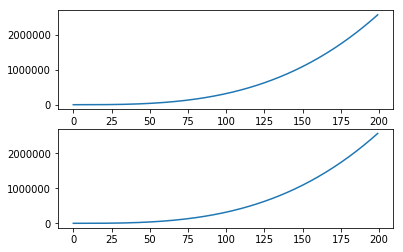

In [19]:
import matplotlib.pyplot as plt

def fonction1(n):
    nb = 0
    for i in range(1,n-1):
        for j in range(i+1,n):
            for k in range(1,j):
                nb = nb + 1
    return nb

def fonction2(n):
    nb = 0
    for i in range(1,n):
        for j in range(1,i):
            for k in range(1,i):
                nb = nb + 1
    return nb

t = []
for i in range(0,200):
    t.append(fonction1(i))
t2 = []
for i in range(0,200):
    t2.append(fonction2(i))

fig,(a,b) = plt.subplots(2)
a.plot(t)
b.plot(t2)

Le deuxième algorithme est plus rapide que le premier